In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.isnull().sum().sort_values(ascending = False)

bmi                  201
stroke                 0
smoking_status         0
avg_glucose_level      0
Residence_type         0
work_type              0
ever_married           0
heart_disease          0
hypertension           0
age                    0
gender                 0
id                     0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()

lbl_encoder.fit(df['gender'].drop_duplicates())
df['gender'] = lbl_encoder.transform(df['gender'])

lbl_encoder.fit(df['ever_married'].drop_duplicates())
df['ever_married'] = lbl_encoder.transform(df['ever_married'])

lbl_encoder.fit(df['work_type'].drop_duplicates())
df['work_type'] = lbl_encoder.transform(df['work_type'])

lbl_encoder.fit(df['Residence_type'].drop_duplicates())
df['Residence_type'] = lbl_encoder.transform(df['Residence_type'])

lbl_encoder.fit(df['smoking_status'].drop_duplicates())
df['smoking_status'] = lbl_encoder.transform(df['smoking_status'])

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB


In [6]:
from sklearn.impute import SimpleImputer
# strategy = 'medain', 'mean', 'most_frequent'
impute = SimpleImputer(strategy = 'mean')
data_array = impute.fit_transform(df)

df = pd.DataFrame(data_array, columns = df.columns)

In [7]:
df.isnull().sum().sort_values(ascending = False)

stroke               0
smoking_status       0
bmi                  0
avg_glucose_level    0
Residence_type       0
work_type            0
ever_married         0
heart_disease        0
hypertension         0
age                  0
gender               0
id                   0
dtype: int64

In [8]:
# class count
class_count_0, class_count_1 = df['stroke'].value_counts()

# Separate class
class_0 = df[df['stroke'] == 0]
class_1 = df[df['stroke'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4861, 12)
class 1: (249, 12)


In [9]:
from sklearn.utils import resample
df_0 = df[df['stroke'] == 0]
df_1 = df[df['stroke'] == 1]

df_1_upsample = resample(df_1, n_samples = 4500, replace = True, random_state = 3)
df = pd.concat([df_0, df_1_upsample])

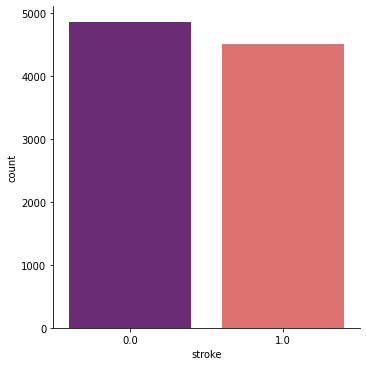

In [10]:
sns.catplot(x = "stroke", kind = "count", data = df, palette = 'magma')

In [11]:
df=df.drop(columns='id', axis=0)

df=df.drop(columns='Residence_type', axis=0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9361 entries, 249 to 64
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9361 non-null   float64
 1   age                9361 non-null   float64
 2   hypertension       9361 non-null   float64
 3   heart_disease      9361 non-null   float64
 4   ever_married       9361 non-null   float64
 5   work_type          9361 non-null   float64
 6   avg_glucose_level  9361 non-null   float64
 7   bmi                9361 non-null   float64
 8   smoking_status     9361 non-null   float64
 9   stroke             9361 non-null   float64
dtypes: float64(10)
memory usage: 1.1 MB


In [13]:
# Split & Scale DF
from sklearn.model_selection import train_test_split
X = df.drop(['stroke'], axis = 1)
Y = df['stroke']

from sklearn import preprocessing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

#using Standared Scaller
scaler_train = preprocessing.StandardScaler().fit(x_train)
scaler_test = preprocessing.StandardScaler().fit(x_test)

x_train_scaled = scaler_train.transform(x_train)
x_test_scaled = scaler_test.transform(x_test)

In [14]:
x_train.shape

(7488, 9)

In [15]:
pip install xgboost

In [16]:
noise = np.random.normal(0,1,[7488,9])
x_train_scaled = x_train_scaled + noise

In [17]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train_scaled, y_train)

# predict
prediction = xgb_model.predict(x_test_scaled)

# accuracy score
train_score = xgb_model.score(x_train_scaled, y_train)
test_score = xgb_model.score(x_test_scaled, y_test)

print(train_score)
print(test_score)

C:\Users\vishwajeet\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9350961538461539
0.7084890549919914


[]

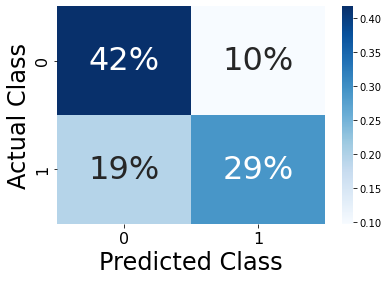

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

prprediction = xgb_model.predict(x_test_scaled)
ax= plt.subplot()
cm= confusion_matrix(y_test, prprediction)
sns.heatmap(cm / np.sum(cm), annot = True, fmt = "0.0%", cmap="Blues", annot_kws={"size":32}, ax=ax)

#ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Class', fontsize = 24)
ax.set_ylabel('Actual Class', fontsize = 24)
ax.xaxis.set_ticklabels(['0', '1'], fontsize=16)
ax.yaxis.set_ticklabels(['0', '1'], fontsize=16)

plt.plot()

In [19]:
xgb_model.predict([[1.0,34.0,0.0,0.0,1.0,2.0,76.46,21.2,1.0]])

array([1.])

In [20]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
249,1.0,3.0,0.0,0.0,0.0,4.0,95.12,18.000000,0.0,0.0
250,1.0,58.0,1.0,0.0,1.0,2.0,87.96,39.200000,2.0,0.0
251,0.0,8.0,0.0,0.0,0.0,2.0,110.89,17.600000,0.0,0.0
252,0.0,70.0,0.0,0.0,1.0,2.0,69.04,35.900000,1.0,0.0
253,1.0,14.0,0.0,0.0,0.0,1.0,161.28,19.100000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
240,1.0,66.0,0.0,0.0,1.0,2.0,76.46,21.200000,1.0,1.0
173,0.0,80.0,1.0,0.0,1.0,3.0,91.02,32.900000,1.0,1.0
107,0.0,54.0,0.0,0.0,1.0,3.0,191.82,40.400000,3.0,1.0
130,0.0,73.0,1.0,0.0,1.0,2.0,190.14,36.500000,2.0,1.0


In [21]:
import pickle
with open('xgb.pkl','wb') as f:
    pickle.dump(xgb_model,f)

In [22]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))